Paul-Renaud Raymond

I'm presented with a dataset on Kansis City Housing statistics. 

The three main questions I'm interested in answering are:
1.
2.
3.

I think more insight to these questions will be valuable to many stakeholders including but not limited to ....

___Import All Packages___

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


___Load the Data File___

In [5]:
data = pd.read_csv("kc_house_data.csv")

___Inspect Dimensions___

In [6]:
data.shape

(21597, 21)

Observation: There are over 21K rows and 21 columns. Will keep this in mind when deciding how to address null values if any found in the data set.

___Inspect First 5 Rows___

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Some initial observations: The file seems to have loaded correctly and most of the table appears to have non null values. Will explore the details further to assess the magnitude of missing values and to ensure that predictors have the correct data types..

Inspect the columns in the file for type

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Relative to __long__ and __lat__, __zipcode__ has much less unique columns. Since I believe there's great association between zipcode and geolocator, I will delete the __long__ and __lat__ columns

In [9]:
#corr_check = pd.DataFrame[data("zipcode","long")]
#confirm high correlation among zipcode and long/lat

In [10]:
data = data.drop(['long','lat'], 1)

I'll now take a look at the [analytical composition] of the dataset.

In [11]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


__"id"__ is interesting. I would expect each entry to have a unique identification; that does not appear to be the case. I'll investigate with __value_counts__.

In [12]:
data.id.value_counts().unique()

array([3, 2, 1])

Some of the IDs appear twice. Let me confirm that these are not duplicates.

Digging into one of the IDs that appeared twice:

In [13]:
data.loc[data.id == 1788900230]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
13743,1788900230,7/22/2014,86500.0,3,1.0,840,9480,1.0,0.0,0.0,3,6,840,0.0,1960,0.0,98023,840,9420
13744,1788900230,4/3/2015,199950.0,3,1.0,840,9480,1.0,0.0,0.0,3,6,840,0.0,1960,0.0,98023,840,9420


Seems like the same home with two different transactions. I will not remove ID multiples since both transactions are important pieces of information. Additionally, since ID should not be a strong independent variable, I won't focus on updating the column (i.e ID1A, ID1B) to differentiate among transactions.

This observation does highlight the importance of time period, or specically with our data, the __"date"__ predictor. As a first pass model, I will take a general approach by not accounting for timeseries. Therefore I will drop the __"date"__ column.

In [14]:
data = data.drop('date', 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(1)
memory usage: 3.0+ MB


Although there could be considerable variance in saleprice for the same home, keeping all values could provide more accuracy given the cyclical nature of real estate.

There are also some unusual values for max(bedrooms) and max(sqft_lot15). I'll investigate to see if these values should remain in the set.

In [15]:
data.loc[data.sqft_lot15 > 500000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
9705,225079036,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,3,11,3605,1940.0,2003,0.0,98014,3420,871200
13451,3420069060,790000.0,3,2.5,2640,432036,1.5,0.0,3.0,3,10,2640,0.0,1996,0.0,98022,1500,560617
20436,1125079111,1600000.0,4,5.5,6530,871200,2.0,0.0,2.0,3,11,6530,0.0,2008,0.0,98014,1280,858132


There are 2 records for homes with more than 10 bedrooms. I'll remove these rows.

In [16]:
data = data.drop(data[data['bedrooms']> 10].index)

There are over 300 records for homes with more than 100K sqft_lot15. Given how this is defined I will only remove records with sqft_1ot15 greater than 500k. A bit arbitrary. However, using the official defintion of outlier as related to Q3, could omit the fact that extraordinary homes exist and impact the real estate market.

In [17]:
data = data.drop(data[data['sqft_lot15']>500000].index)

In [18]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159200e+04,2.159200e+04,21592.000000,21592.000000,21592.000000,2.159200e+04,21592.000000,19216.000000,21529.000000,21592.000000,21592.000000,21592.00000,21592.000000,17750.000000,21592.000000,21592.000000,21592.000000
mean,4.581121e+09,5.402139e+05,3.371434,2.115540,2079.908114,1.500169e+04,1.494049,0.007598,0.233685,3.409828,7.657558,1788.26005,1970.998888,83.547718,98077.957901,1986.665848,12654.735087
std,2.876707e+09,3.673253e+05,0.902682,0.768589,917.375271,4.049005e+04,0.539702,0.086836,0.765443,0.650507,1.172769,827.08761,29.373588,399.742312,53.513762,685.190077,25747.205274
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.00000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.00000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,3.904935e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.00000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,7.309100e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.00000,1997.000000,0.000000,98118.000000,2360.000000,10080.000000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.00000,2015.000000,2015.000000,98199.000000,6210.000000,438213.000000


I'll next look into null values and decide a course of action if any are indeed present.

___Summarize the Total Number of Null Values___

In [19]:
data.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

__"waterfront"__ and __"yr_renovated"__ both have a considerable amount of null values. __"view"__ also has some null values. I will decide how to address this later in the data transformation process.

___Choose EDA Framework___

At this point, I will decide which data science framework to use in the process of completing the project. It may be helpful to weight the pros and cons of each framework in the _Exploratory Data Analysis_ step.

Among the three approaches (__CRISP-DM, KDD, OSEMIn__), I will start with the OSEMN framework since it is fairly straightforward. I have already completed the first step: __Obtaining the data__. I'm left with scrubbing the data, exploring the data, creating model, and finally interpreting the results that are meaningful to stakeholders.

There are quite a bit of [predictors to convert] in the __Scrub__ phase. I'll start on that next.

A number of predictors should be converted to strings, although they contain numbers, because they essentially represent discrete values or categories. Moreover, having these categories as integers or floats can invite the risk of mathematical issues occuring with values that are not meant to be computed.

___Convert Predictors___

In [20]:
data.bathrooms = data.bathrooms.astype("str")
data.bedrooms = data.bedrooms.astype("str")
data.view = data.view.astype("str")
data.grade = data.grade.astype("str")
data.zipcode = data.zipcode.astype("str")
data.condition = data.condition.astype("str")
data.yr_built = data.yr_built.astype("str")
data.floors = data.floors.astype("str")
data.waterfront = data.waterfront.astype("str")
data.yr_built = data.yr_built.astype("int")
# data.yr_renovated = data.yr_renovated.astype("int")
data.describe()

,id,price,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.159200e+04,2.159200e+04,21592.000000,2.159200e+04,21592.00000,21592.000000,17750.000000,21592.000000,21592.000000
mean,4.581121e+09,5.402139e+05,2079.908114,1.500169e+04,1788.26005,1970.998888,83.547718,1986.665848,12654.735087
std,2.876707e+09,3.673253e+05,917.375271,4.049005e+04,827.08761,29.373588,399.742312,685.190077,25747.205274
min,1.000102e+06,7.800000e+04,370.000000,5.200000e+02,370.00000,1900.000000,0.000000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,1430.000000,5.040000e+03,1190.00000,1951.000000,0.000000,1490.000000,5100.000000
50%,3.904935e+09,4.500000e+05,1910.000000,7.617500e+03,1560.00000,1975.000000,0.000000,1840.000000,7620.000000
75%,7.309100e+09,6.450000e+05,2550.000000,1.068250e+04,2210.00000,1997.000000,0.000000,2360.000000,10080.000000
max,9.900000e+09,7.700000e+06,13540.000000,1.651359e+06,9410.00000,2015.000000,2015.000000,6210.000000,438213.000000


I encountered an issue converting "sqft_basement" into a float. After additional inspection of the error note, I notice non-numnerical values that can't be converted.
Performing value_counts indicates that there are 454 occurances of "?", likely due to missing values, since there are also many occurences of "0" (or no basement in the home). My initial thought is to eliminate these rows given the relatively small percentage of rows but I'd like to compare the descriptive summary of this set to the overall descriptive summary to ensure minimal impact.

In [21]:
data_check = data.loc[data.sqft_basement == "?"]

In [22]:
data_check.describe()

,id,price,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,4.540000e+02,4.540000e+02,454.000000,454.000000,454.000000,454.000000,366.000000,454.000000,454.000000
mean,4.555794e+09,5.303233e+05,2052.431718,15670.872247,1766.607930,1969.903084,114.273224,1956.299559,13659.028634
std,2.898736e+09,3.330030e+05,897.855170,50029.197716,797.471819,31.773889,463.833410,664.449227,31810.906918
min,1.120040e+07,1.025000e+05,600.000000,681.000000,600.000000,1900.000000,0.000000,740.000000,977.000000
25%,2.066505e+09,3.207500e+05,1430.000000,5000.000000,1162.500000,1944.250000,0.000000,1490.000000,5000.000000
50%,3.883402e+09,4.570000e+05,1900.000000,7200.000000,1595.000000,1975.000000,0.000000,1800.000000,7211.000000
75%,7.235076e+09,6.495000e+05,2510.000000,10481.000000,2180.000000,1999.000000,0.000000,2337.500000,9902.250000
max,9.834200e+09,3.420000e+06,6930.000000,881654.000000,5450.000000,2015.000000,2014.000000,4560.000000,438213.000000


The two tables look consistent. If possible a joint plot with the two sets could be helpful to make a more accurate determination, visually. I'll move forward with removing these rows and completing the conversion of __sqft_basment__ to a float.

In [23]:
data = data.drop(data[data['sqft_basement']=="?"].index)

In [24]:
data.sqft_basement = data.sqft_basement.astype("float")

Address nulls

In [25]:
data.waterfront.isna().sum()

0

__"waterfront"__, __"view"__, and __"yr_renovated"__ are each categorical data. It could make sense for these predictors to have null values, however, these predictors also have a "0" values which indicates no renovation or waterfront. Therefore it makes sense for now to remove rows with null values since at worst case, the nulls for both predictors can only account for ~25% of the data set.

In [26]:
# data.waterfront.dropna(inplace=True)
# data.yr_renovated.dropna(inplace=True)
# data.view              .dropna(inplace=True)
# data.waterfront.isna().sum()
## Initially tried to drop rows individually by predictor but found that the following is appropriate command 
data.dropna(inplace=True)

In [27]:
data.describe()

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,1.738400e+04,1.738400e+04,17384.000000,1.738400e+04,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000,17384.000000
mean,4.587158e+09,5.408401e+05,2084.859929,1.517269e+04,1792.030545,292.829383,1971.125173,82.900828,1990.813046,12705.565693
std,2.875784e+09,3.701072e+05,917.747557,4.117861e+04,826.856335,443.733448,29.309835,398.272083,685.742901,25675.472340
min,1.000102e+06,8.000000e+04,370.000000,5.200000e+02,370.000000,0.000000,1900.000000,0.000000,399.000000,659.000000
25%,2.126049e+09,3.213818e+05,1430.000000,5.046750e+03,1200.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000
50%,3.905030e+09,4.500000e+05,1920.000000,7.620000e+03,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7623.500000
75%,7.326200e+09,6.450000e+05,2550.000000,1.067050e+04,2220.000000,560.000000,1997.000000,0.000000,2370.000000,10090.250000
max,9.895000e+09,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,434728.000000


__sqft_basement__ is now a float yet it has a relatively high max value. Let me investigate for outliers that should be remove.

In [28]:
data.loc[data.sqft_basement > 1500]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
5,7237550310,1230000.0,4,4.5,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,4760,101930
10,1736800520,662500.0,3,2.5,3560,9796,1.0,nan,0.0,3,8,1860,1700.0,1965,0.0,98007,2210,8925
41,7766200013,775000.0,4,2.25,4220,24186,1.0,0.0,0.0,3,8,2600,1620.0,1984,0.0,98166,2410,30617
51,7231300125,345000.0,5,2.5,3150,9134,1.0,0.0,0.0,4,8,1640,1510.0,1966,0.0,98056,1990,9133
69,1802000060,1330000.0,5,2.25,3200,20158,1.0,0.0,0.0,3,8,1600,1600.0,1965,0.0,98004,3390,20158
70,1525059190,1040000.0,5,3.25,4770,50094,1.0,0.0,0.0,4,11,3070,1700.0,1973,0.0,98005,3530,38917
153,7855801670,2250000.0,4,3.25,5180,19850,2.0,0.0,3.0,3,12,3540,1640.0,2006,0.0,98006,3160,9750
185,825059270,1100000.0,5,3.0,4090,12850,1.0,0.0,2.0,4,10,2090,2000.0,1986,0.0,98033,2540,10270
218,1250202145,1070000.0,2,2.25,3900,14864,1.0,0.0,3.0,3,8,1950,1950.0,1947,0.0,98144,2580,5184
239,5152100060,472000.0,6,2.5,4410,14034,1.0,0.0,2.0,4,9,2350,2060.0,1965,0.0,98003,2600,13988


I'll drop rows with a __sqft_basement__ value greater than 1,500 to clean the data further.

In [29]:
data = data.drop(data[data['sqft_basement']>1500].index)

___Decide Which Columns to Keep___

We learned that multicolinearity can be an issue with regression models. I would like to explore the relationships among predictors, noting high correlation between particular predictors, and then deciding which columns to drop initially before the modeling step.

I will create a heatmap to help quickly identify problematic predictors.

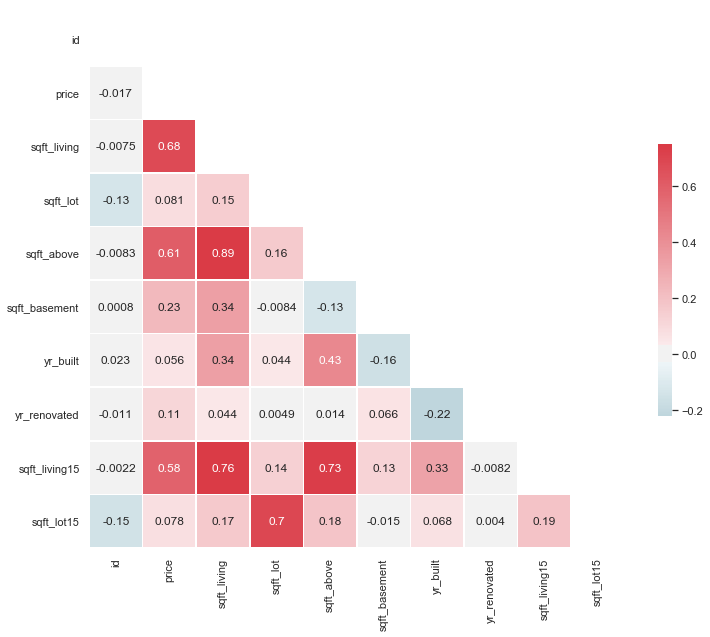

In [30]:
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.75, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5})

The shades of red indicate some strong association between predictors. I'll use correlation of .75 as threshold for which predictors to remove if it appears more than once for a particular predictor.

I will remove __"sqft_living"__ given its high association with __"sqft_living15"__, __"grade"__, and __"sqft_above"__.

In [31]:
data.drop(columns="sqft_living", inplace=True)

In [32]:
data.shape

(17095, 17)

___Check for Normality___

A key assumption in our model is that the sample of data used is normally distributed. This assumption is also applied to the distribution of our predictor variables. However this extension of the assumption of normal distribution is not always true for specific predictors. 

I'll explore the data, specifically the distribution of numerical predictor values to assess their respective distributions.

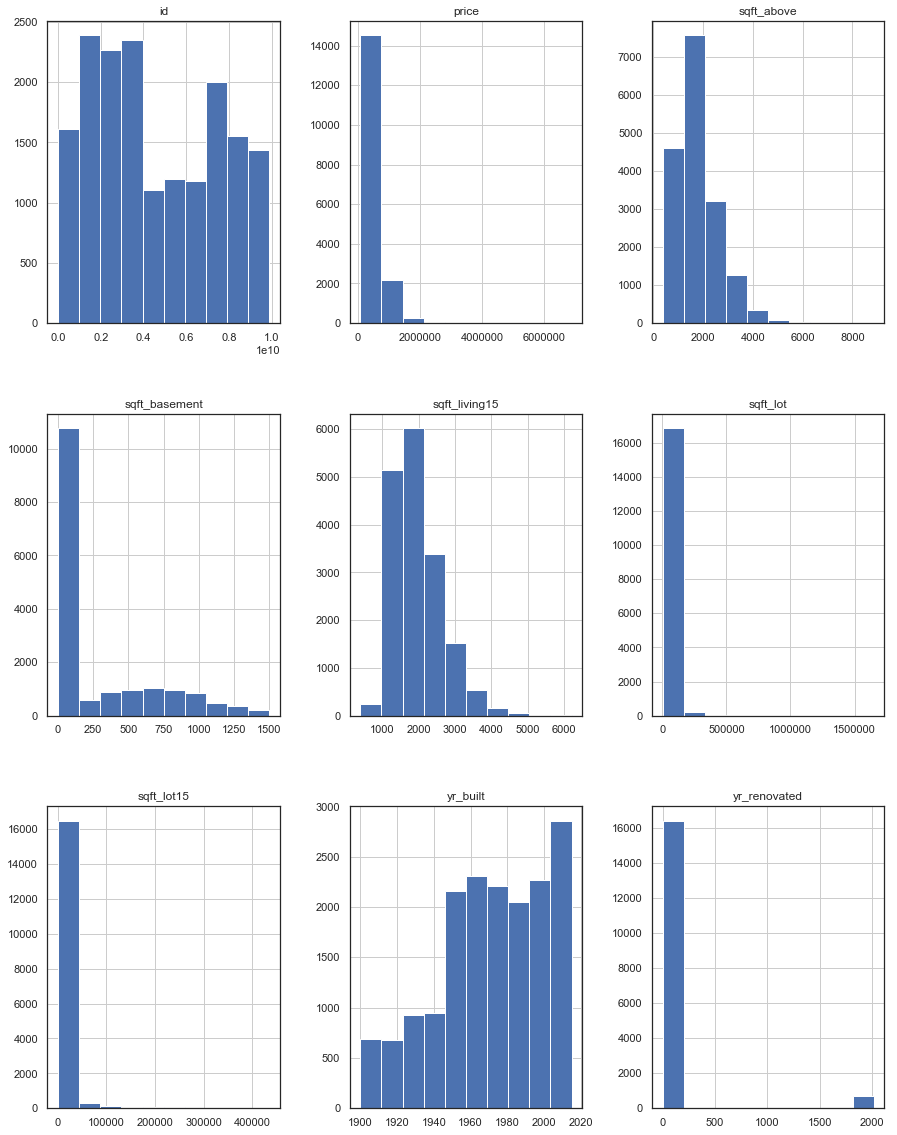

In [33]:
data.hist(figsize=(15,20));

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


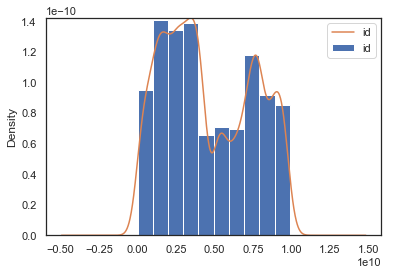

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


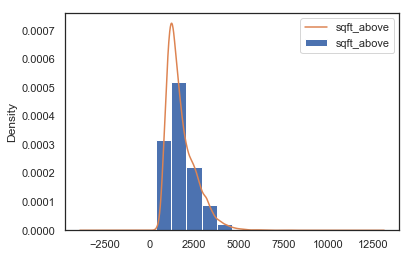

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


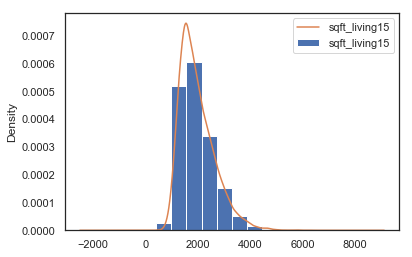

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


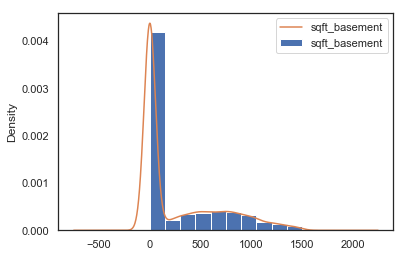

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


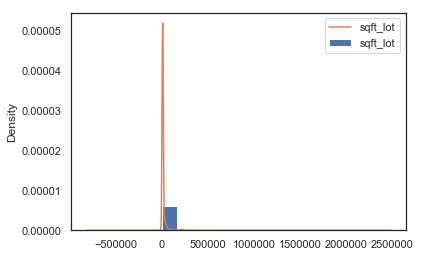

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


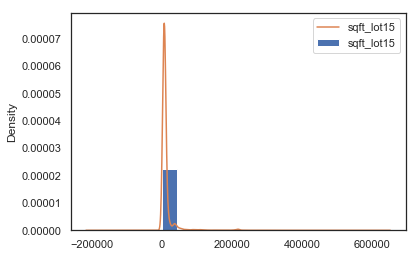

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


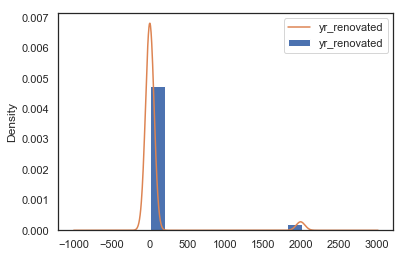

In [34]:
for column in ['id','sqft_above','sqft_living15','sqft_basement','sqft_lot','sqft_lot15','yr_renovated']:
    data[column].plot.hist(normed=True)
    data[column].plot.kde(label=column)
    plt.legend()
    plt.show()

Upon observation, most of the distributions display skewness. __"id"__ has a bimodal distribution likely due to the resales of homes in 2015.

Initial thought is to perfrom log transformations on the __sqft_lot15__, __sqft_lot__, __sqft_living15__, __sqft_above__, __price__, __long__, __lat__, and __id__. However, the negative values in __long__ and __lat__ present issues with this approach [why]. Instead, I'll normalize these predictors with z-scores to be consistent.

In [35]:
### to eliminate (log transformations) ###
# data_log = pd.DataFrame([])
# data_log["logid"]=np.log(data["id"])
# data_log["loglat"]=np.log(data["lat"])
# data_log["loglong"]=np.log(data["long"])
# data_log["logprice"]=np.log(data["price"])
# data_log["logsqft_above"]=np.log(data["sqft_above"])
# data_log["logsqft_lot15"]=np.log(data["sqft_lot15"])
# data_log["logsqft_lot"]=np.log(data["sqft_lot"])
# data_log["logyr_renovated"]=np.log(data["yr_renovated"])

In [36]:
data.id = (data.id - data.id.mean())/data.id.std() #is this necessary?
#data.lat = (data.lat - data.lat.mean()) / data.lat.std()
#data.long = (data.long - data.long.mean()) / data.long.std()
data.sqft_above = (data.sqft_above - data.sqft_above.mean()) / data.sqft_above.std()
data.sqft_lot15 = (data.sqft_lot15 - data.sqft_lot15.mean()) / data.sqft_lot15.std()
data.sqft_lot = (data.sqft_lot - data.sqft_lot.mean()) / data.sqft_lot.std()
data.sqft_basement = (data.sqft_basement - data.sqft_basement.mean()) / data.sqft_basement.std()
data.yr_renovated = (data.yr_renovated - data.yr_renovated.mean()) / data.yr_renovated.std()
#data.price = (data.price - data.price.mean()) / data.price.std() #should i normalize the target?

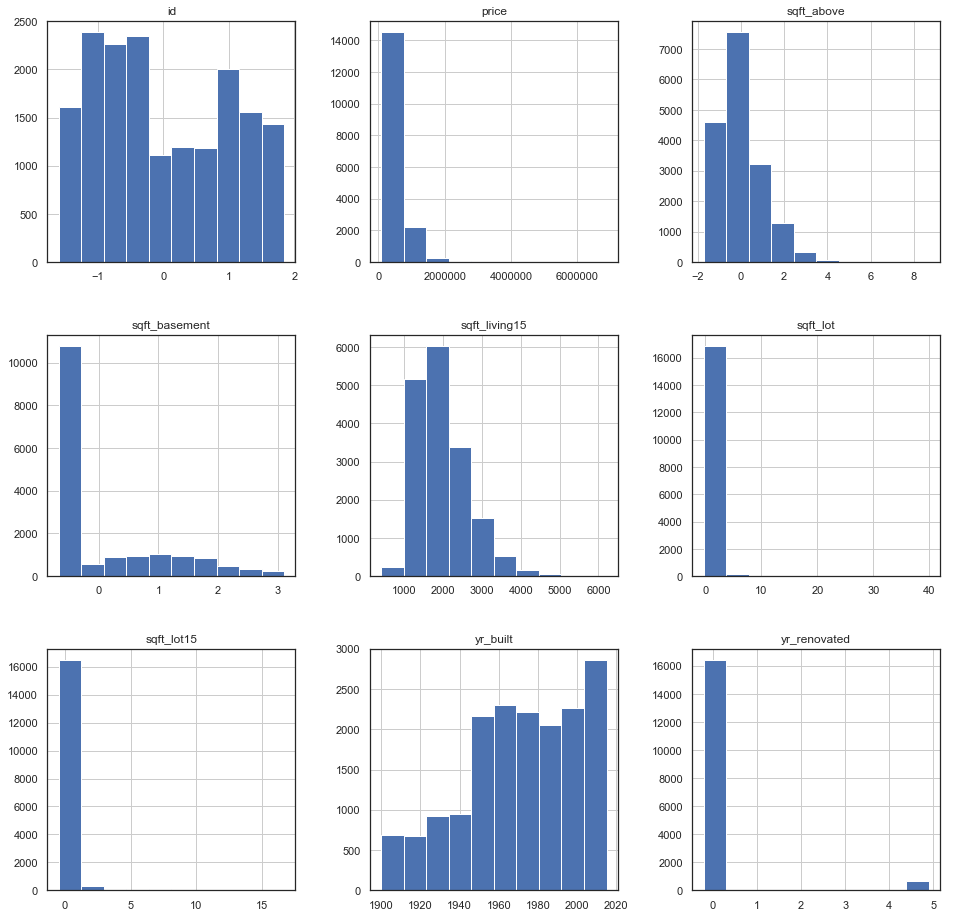

In [37]:
data.hist(figsize=(16,16));

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17095 entries, 0 to 21596
Data columns (total 17 columns):
id               17095 non-null float64
price            17095 non-null float64
bedrooms         17095 non-null object
bathrooms        17095 non-null object
sqft_lot         17095 non-null float64
floors           17095 non-null object
waterfront       17095 non-null object
view             17095 non-null object
condition        17095 non-null object
grade            17095 non-null object
sqft_above       17095 non-null float64
sqft_basement    17095 non-null float64
yr_built         17095 non-null int64
yr_renovated     17095 non-null float64
zipcode          17095 non-null object
sqft_living15    17095 non-null int64
sqft_lot15       17095 non-null float64
dtypes: float64(7), int64(2), object(8)
memory usage: 2.3+ MB


These numerical distributions still exhibit skewness. I'll revisit if I notice issues in the modeling stage.

Next, I will address the categorical columns with one-hot encoding

___One-Hot Encoding___

In [39]:
# data = pd.get_dummies(data)

In [40]:
data.shape

(17095, 17)

In [41]:
data.describe()
# data.yr_built = data.yr_built.astype('str')

,id,price,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,1.709500e+04,1.709500e+04,1.709500e+04,1.709500e+04,1.709500e+04,17095.000000,1.709500e+04,17095.000000,1.709500e+04
mean,-1.586070e-16,5.275811e+05,6.883448e-17,-4.165593e-16,4.157436e-15,1971.073062,-1.310544e-16,1973.022463,4.171893e-16
std,1.000000e+00,3.347049e+05,1.000000e+00,1.000000e+00,1.000000e+00,29.399757,1.000000e+00,669.896209,1.000000e+00
min,-1.595191e+00,8.000000e+04,-3.519437e-01,-1.730082e+00,-6.728229e-01,1900.000000,-2.061553e-01,399.000000,-4.689742e-01
25%,-8.566511e-01,3.200000e+05,-2.423465e-01,-7.231693e-01,-6.728229e-01,1952.000000,-2.061553e-01,1480.000000,-2.934330e-01
50%,-2.383864e-01,4.490000e+05,-1.800456e-01,-2.811099e-01,-6.728229e-01,1975.000000,-2.061553e-01,1830.000000,-1.950098e-01
75%,9.534838e-01,6.350000e+05,-1.082586e-01,5.170528e-01,6.633413e-01,1997.000000,-2.061553e-01,2340.000000,-9.974878e-02
max,1.843357e+00,6.890000e+06,3.995716e+01,8.695150e+00,3.108774e+00,2015.000000,4.898689e+00,6210.000000,1.668864e+01


Clearly, some bins are needed to make the data set more manageable. I'll start by creating bins for __year_built__ to categorize the records in most to less-recently built.

In [42]:
# bins = ['Built_1', 'Built_2', 'Built_3', 'Built_4', 'Built_5','Built_6','Built_7','Built_8','Built_9','Built_10']

# for i in range (1, 11):
#     data["Built_" + str(i)] = pd.cut(data["yr_built" + str(i)], 10, labels=bins)
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
data['Built_binned'] = pd.cut(data['yr_built'], bins)
data['Renovated_binned'] = pd.cut(data['yr_renovated'], bins)
data.drop(columns=["yr_built","yr_renovated"], inplace=True)



In [43]:
data.dtypes

id                   float64
price                float64
bedrooms              object
bathrooms             object
sqft_lot             float64
floors                object
waterfront            object
view                  object
condition             object
grade                 object
sqft_above           float64
sqft_basement        float64
zipcode               object
sqft_living15          int64
sqft_lot15           float64
Built_binned        category
Renovated_binned    category
dtype: object

I'll replace null values with "NaN"

In [44]:
data.Built_binned.replace("","NaN")
data.Renovated_binned.replace("","NaN")

0       NaN
1       NaN
3       NaN
4       NaN
7       NaN
8       NaN
9       NaN
11      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
19      NaN
20      NaN
21      NaN
22      NaN
24      NaN
25      NaN
27      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
         ..
21559   NaN
21560   NaN
21561   NaN
21562   NaN
21563   NaN
21564   NaN
21566   NaN
21567   NaN
21568   NaN
21569   NaN
21570   NaN
21571   NaN
21572   NaN
21573   NaN
21578   NaN
21580   NaN
21582   NaN
21584   NaN
21585   NaN
21586   NaN
21587   NaN
21588   NaN
21589   NaN
21590   NaN
21591   NaN
21592   NaN
21593   NaN
21594   NaN
21595   NaN
21596   NaN
Name: Renovated_binned, Length: 17095, dtype: float64

In [45]:
data.isna().sum()

id                      0
price                   0
bedrooms                0
bathrooms               0
sqft_lot                0
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
sqft_above              0
sqft_basement           0
zipcode                 0
sqft_living15           0
sqft_lot15              0
Built_binned           68
Renovated_binned    17095
dtype: int64

In [46]:
data = pd.get_dummies(data)

___Check for Linearity between Predictors and Target___

As a final step before the modeling stage, I'll perform a joint plot to check for the linearity assumption between predictors and target variables.

In [47]:
##paused to speed up run time
# for column in data.columns:
#     sns.jointplot(x=column, y="price", data=data, kind='reg', label=column, joint_kws={'line_kws':{'color':'green'}})
#     plt.legend()
#     plt.show()

At an initial glance, some predictors exhibit a linear relationship with the target variable. I'll move forward with the modeling stage.

___Build linear model___

I'll first take a look at statistics for linear regression models for all continuous variables.

In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [49]:
data.describe().columns.drop(['price'])
#

Index(['id', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'bedrooms_1', 'bedrooms_10', 'bedrooms_2', 'bedrooms_3',
       ...
       'Renovated_binned_(1920, 1930]', 'Renovated_binned_(1930, 1940]',
       'Renovated_binned_(1940, 1950]', 'Renovated_binned_(1950, 1960]',
       'Renovated_binned_(1960, 1970]', 'Renovated_binned_(1970, 1980]',
       'Renovated_binned_(1980, 1990]', 'Renovated_binned_(1990, 2000]',
       'Renovated_binned_(2000, 2010]', 'Renovated_binned_(2010, 2020]'],
      dtype='object', length=167)

In [50]:
#NameError: name 'Index' is not defined
#Index(['sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [51]:
col_names = data.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept','slope', 'p-value']]
for idx, val in enumerate(col_names):
    print ("Kansas City Real Estate: price~" + val)
    print ("------------------------------")
    
    f = "price~" + val
    model = smf.ols(formula=f, data=data).fit()
    X_new = pd.DataFrame({val: [data[val].min(), data[val].max()]})
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[idx + 1])

Kansas City Real Estate: price~id
------------------------------


NameError: name 'smf' is not defined

I notice that the r-squared values are low

___Another approach with individual predictors___

In [58]:
f = 'price~sqft_above+sqft_lot+sqft_living15'

In [59]:
model = ols(formula=f, data=data).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     3958.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:35:43   Log-Likelihood:            -2.3721e+05
No. Observations:               17095   AIC:                         4.744e+05
Df Residuals:                   17091   BIC:                         4.745e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       2.34e+05   8764.496     26.701      0.000    2.17e+05    2.51e+05
sqft_above     1.314e+05   2911.078     45.147      0.000    1.26e+05    1.37e+05
sqft_lot      -8393.9593   1994.736     -4.208      0.000   -1.23e+04   -4484.072
sqft_living15   148.7886      4.329     34.371      0.000     140.304     157.274
==============================================================================
Omnibus:                    11719.296   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           395553.961
Skew:                           2.848   Prob(JB):                         0.00
Kurtosis:                      25.867   Cond. No.                     9.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

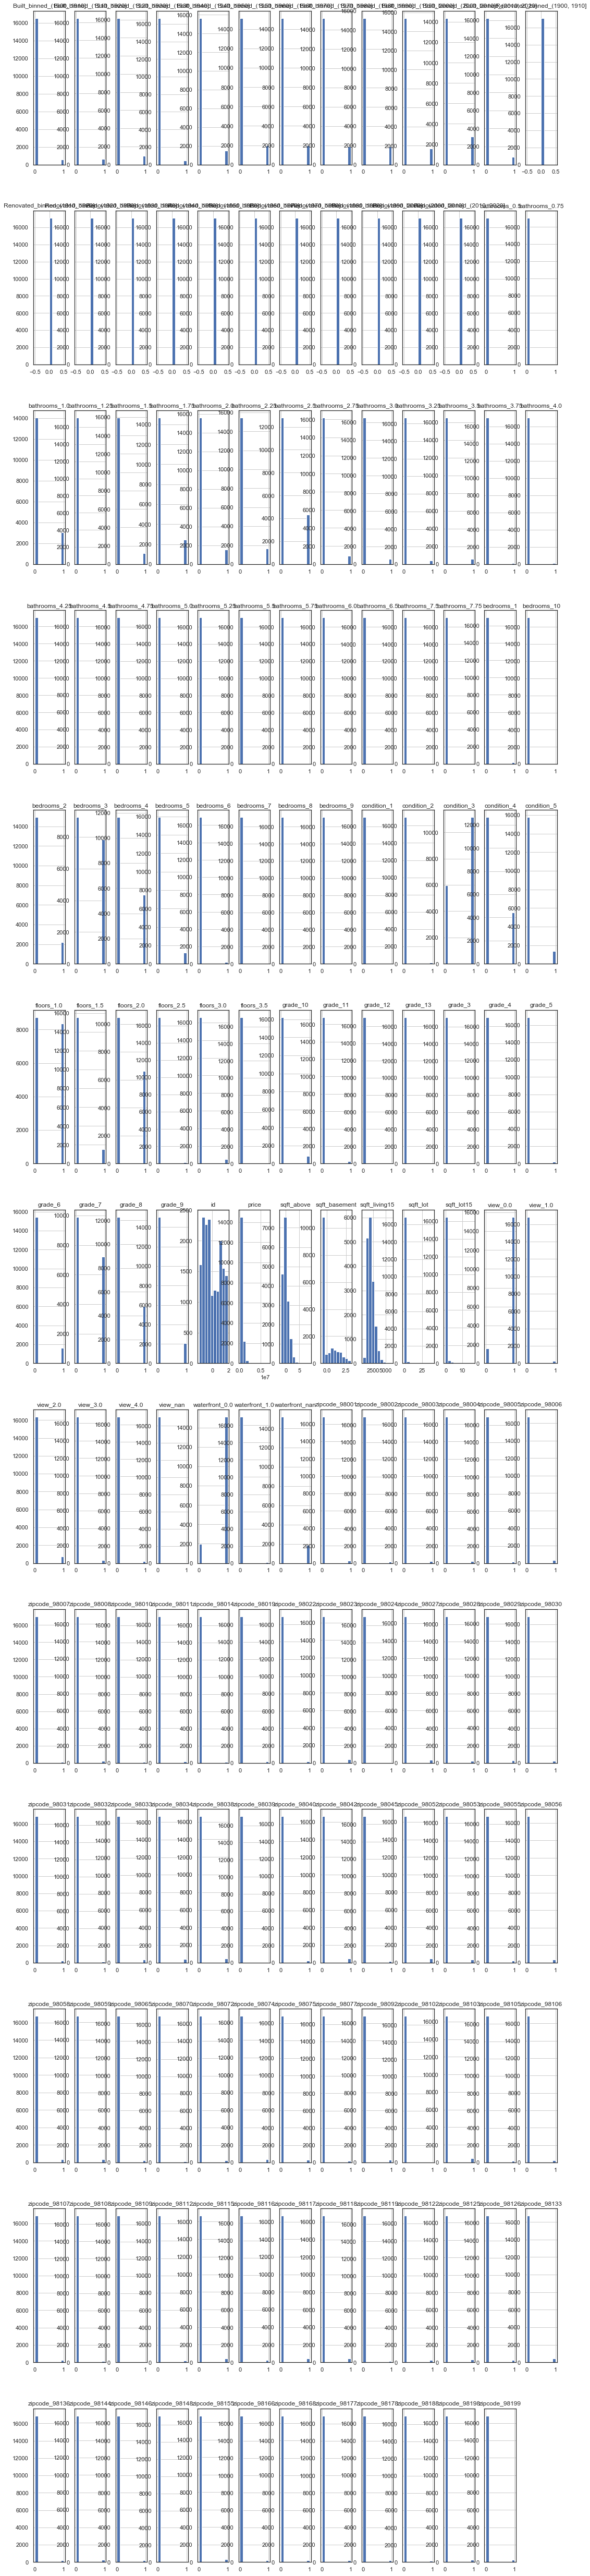

In [879]:
data.hist(figsize=(18,90));

In [883]:
data_log = data

Since ___price___ is most skewed, I'll take a log transformation of it and rerun my regression.

In [884]:
data_log['price']= np.log(data['price'])

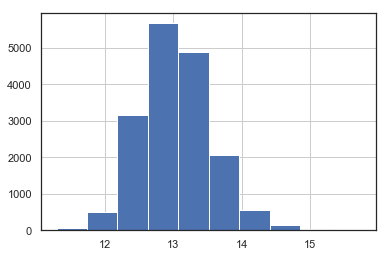

In [885]:
data_log['price'].hist();

Much more like a normal distribution! I'll repeat the linear regression with data_log['price']

In [886]:
col_names = data_log.describe().columns.drop(['price'])
results_log = [['ind_var', 'r_squared', 'intercept','slope', 'p-value']]
for idx, val in enumerate(col_names):
    print ("Kansas City Real Estate: price~" + val)
    print ("------------------------------")
    
    f = "price~" + val
    model = smf.ols(formula=f, data=data_log).fit()
    X_new = pd.DataFrame({val: [data[val].min(), data[val].max()]})
    preds = model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results_log[idx + 1])

Kansas City Real Estate: price~id
------------------------------
['id', 2.647384229637062e-05, 13.034754772179513, -0.0026375253658374037, 0.5011453332427305]
Kansas City Real Estate: price~sqft_lot
------------------------------
['sqft_lot', 0.007944434168766223, 13.034754772179513, 0.045689840466220155, 1.687655066155085e-31]
Kansas City Real Estate: price~sqft_above
------------------------------
['sqft_above', 0.35461014123237655, 13.034754772179513, 0.30525566476456395, 0.0]
Kansas City Real Estate: price~sqft_basement
------------------------------
['sqft_basement', 0.06424990880515558, 13.034754772179513, 0.1299344804218989, 7.92715531180537e-249]
Kansas City Real Estate: price~sqft_living15
------------------------------
['sqft_living15', 0.36747114329172903, 12.119537333774645, 0.0004638656962620374, 0.0]
Kansas City Real Estate: price~sqft_lot15
------------------------------
['sqft_lot15', 0.007245049515027913, 13.034754772179513, 0.04363237320397603, 7.290674022470962e-29]


SyntaxError: invalid syntax (<unknown>, line 1)

r-values did not improve

In [888]:
data.head()

,id,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_10,bedrooms_2,...,"Renovated_binned_(1920, 1930]","Renovated_binned_(1930, 1940]","Renovated_binned_(1940, 1950]","Renovated_binned_(1950, 1960]","Renovated_binned_(1960, 1970]","Renovated_binned_(1970, 1980]","Renovated_binned_(1980, 1990]","Renovated_binned_(1990, 2000]","Renovated_binned_(2000, 2010]","Renovated_binned_(2010, 2020]"
0,0.882169,12.309982,-0.226683,-0.735449,-0.672823,1340,-0.271693,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.633609,13.195614,-0.187810,0.480214,0.335603,1690,-0.193073,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.731140,13.311329,-0.242554,-0.895081,1.621346,1360,-0.297386,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.916309,13.142166,-0.167349,-0.121477,-0.672823,1800,-0.198449,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-0.897681,12.583995,-0.127524,-0.882802,-0.672823,1650,-0.111172,0,0,0,...,0,0,0,0,0,0,0,0,0,0


check for heteroscedasticity

Test - train split

Iterate

Decide variables to drop

Finalize model